In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_pickle("../data/multi_label_train_v0.4.pkl")
df

,url,incidents,places,image_id,key,valid_image,downloadable,incidents_list,places_list
0,https://localtvwtkr.files.wordpress.com/2018/0...,"{'snow covered': 1, 'ice storm': 0, 'hailstorm...","{'parking lot': 0, 'building outdoor': 1}",404,winter_storm_in_parking_lot_00361.jpg,False,False,snow covered,building outdoor
1,https://www.earthmagazine.org/sites/earthmagaz...,{'flooded': 1},"{'field': 0, 'street': 1, 'building outdoor': 0}",404,coastal_flood_in_field_road_00296.jpg,False,False,flooded,street
2,https://s-media-cache-ak0.pinimg.com/originals...,{'truck accident': 0},{},e6a54564-0082-4a26-9df4-13fe39f8ec15,track_crash_in_library_outdoor_af9881c12a.jpg,True,True,unknown,unknown
3,https://m.gjcdn.net/screenshot-thumbnail/300x3...,{'hailstorm': 0},{},404,hailstorm_in_dam_b6ec75ec51.jpg,False,False,unknown,unknown
4,http://nnimgt-a.akamaihd.net/transform/v1/crop...,"{'blocked': 1, 'with smoke': 0, 'under constru...","{'construction site': 0, 'skyscraper': 0, 'dow...",400,blocked_construction_site_094b6eef1a.jpg,False,False,blocked,"building outdoor, downtown"
...,...,...,...,...,...,...,...,...,...
1608667,https://upload.wikimedia.org/wikipedia/commons...,{'fog': 1},"{'street': 0, 'forest': 0}",403,van_wreck_in_alley_564c55a4a6.jpg,False,False,fog,unknown
1608668,http://images.newindianexpress.com/uploads/use...,{'snow covered': 1},"{'port': 0, 'ocean': 0, 'glacier': 0, 'coast': 1}",93c26672-dba8-4f3c-ab66-9a426c9b05f8,oil_spill_in_port_3bfea2121a.jpg,True,True,snow covered,coast
1608669,https://savepetesharbor.files.wordpress.com/20...,"{'flooded': 0, 'under construction': 0}",{},aee52b54-05cc-444b-b410-e5b0ef870c74,blocked_harbor_00122.jpg,True,True,unknown,unknown
1608670,https://i1.ytimg.com/vi/pdyzTYH1L5Q/hqdefault.jpg,{'on fire': 1},"{'industrial area': 1, 'downtown': 0, 'buildin...",c21faea6-5060-4f3f-9d2e-a8b65cfa0f74,wild_fire_in_industrial_area_00230.jpg,True,True,on fire,industrial area


TODO

- Incident vs place heatmap
- Incident vs incident
- Top 10 incident/place
- Subsample and maintain distribution
- Rename images according to key

In [24]:
df[(df["incidents_list"] == "unknown") | (df["places_list"] == "unknown")]

,url,incidents,places,image_id,key,valid_image,downloadable,incidents_list,places_list
2,https://s-media-cache-ak0.pinimg.com/originals...,{'truck accident': 0},{},e6a54564-0082-4a26-9df4-13fe39f8ec15,track_crash_in_library_outdoor_af9881c12a.jpg,True,True,unknown,unknown
3,https://m.gjcdn.net/screenshot-thumbnail/300x3...,{'hailstorm': 0},{},404,hailstorm_in_dam_b6ec75ec51.jpg,False,False,unknown,unknown
8,https://www.storm-solutions.net/hs-fs/hubfs/At...,"{'mudslide mudflow': 0, 'flooded': 0, 'dirty c...",{},cfebd146-2eaa-422c-b86a-0f64a571573b,hurricaine_in_shopfront_00094.jpg,True,True,unknown,unknown
10,http://www.taipeitimes.com/images/2018/02/20/P...,{'car accident': 0},{},0f8c297e-f081-4da0-9e3d-0fef1108c124,car_accident_in_temple_asia_594b5fd7aa.jpg,True,True,unknown,unknown
13,https://ae01.alicdn.com/kf/HTB1KKYMRVXXXXcwXpX...,"{'tropical cyclone': 1, 'storm surge': 0, 'sno...",{'mountain': 0},fb631c63-75bd-4bcf-ac4c-d3b7f0ab1b90,cyclone_in_mountain_d51679c5f1.jpg,True,True,"derecho, dust sand storm, tropical cyclone",unknown
...,...,...,...,...,...,...,...,...,...
1608660,https://wanderlustmarriage.com/wp-content/uplo...,{'blocked': 0},{},e43e7d4a-8278-42de-8bf3-32dbb46b7b1e,volcanic_eruption_in_rope_bridge_00155.jpg,True,True,unknown,unknown
1608663,https://as2.ftcdn.net/jpg/02/20/19/01/500_F_22...,{'fog': 0},{},d0a51563-0ba0-4595-bc41-07e43f273aa8,fog_in_glacier_00496.jpg,True,True,unknown,unknown
1608664,http://mediad.publicbroadcasting.net/p/wrni/fi...,{'ice storm': 0},{},860145f8-423b-495f-8ac4-608ce4db4abb,winter_storm_in_residential_neighborhood_94114...,True,True,unknown,unknown
1608667,https://upload.wikimedia.org/wikipedia/commons...,{'fog': 1},"{'street': 0, 'forest': 0}",403,van_wreck_in_alley_564c55a4a6.jpg,False,False,fog,unknown


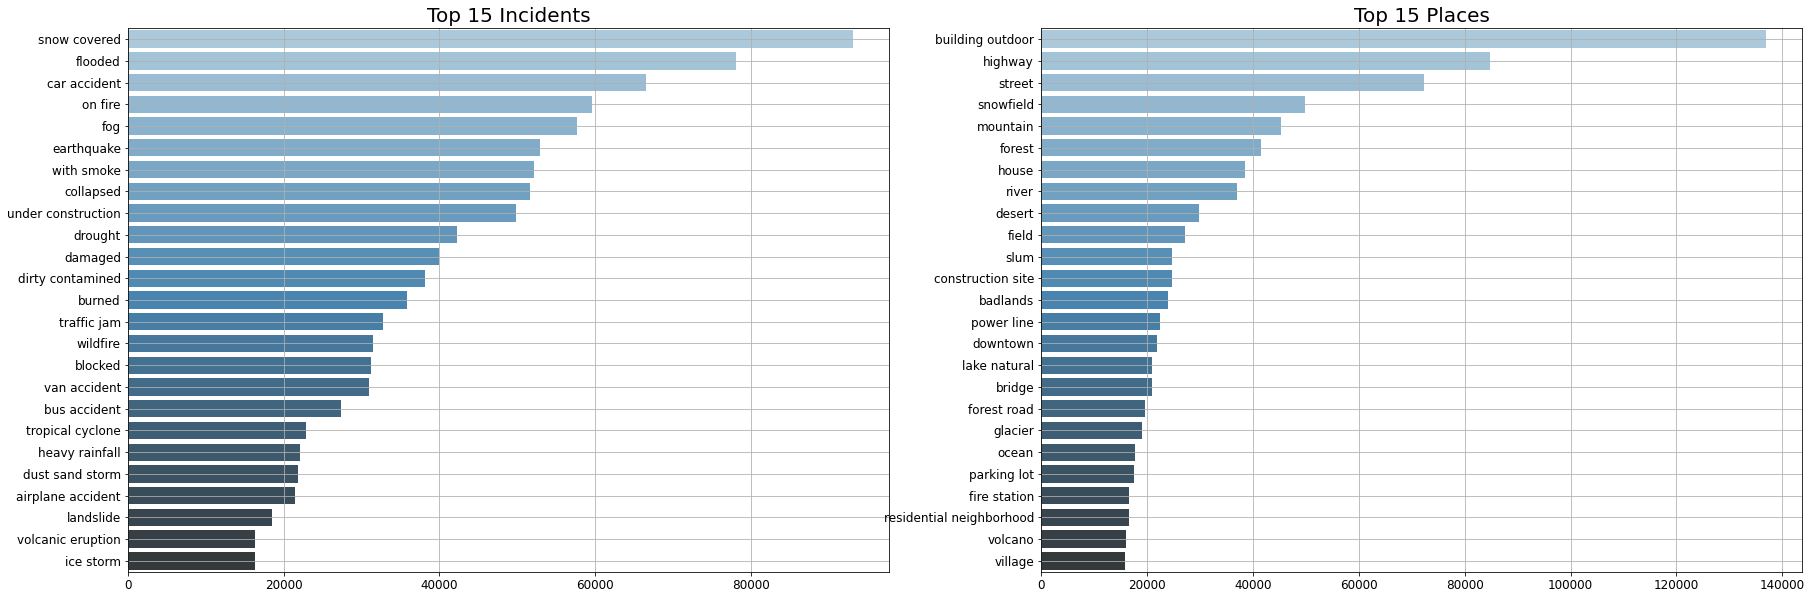

In [42]:
# Get the counts of each incident and place by splitting the string with ", "
# and then counting the number of times each incident or place appears
incidents = df["incidents_list"].str.split(", ").explode().value_counts()[1:]
places = df["places_list"].str.split(", ").explode().value_counts()[1:]

# Only show the top 25 incidents and places
incidents = incidents[:25]
places = places[:25]

# Plot incidents and places as a bar chart with a large font size
fig, ax = plt.subplots(1, 2, figsize=(22, 10))
sns.barplot(x=incidents.values, y=incidents.index, ax=ax[0], palette="Blues_d")
sns.barplot(x=places.values, y=places.index, ax=ax[1], palette="Blues_d")
ax[0].set_title("Top 15 Incidents", fontsize=20)
ax[1].set_title("Top 15 Places", fontsize=20)
# Make the font size of the x and y axis labels larger
ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
ax[0].grid()
ax[1].grid()
plt.show()


In [26]:
df["Number of known incidents"] = df.incidents.apply(lambda x: len({k: v for k, v in dict(x).items() if v == 1}))
df["Number of unknown incidents"] = df.incidents.apply(lambda x: len({k: v for k, v in dict(x).items() if v == 0}))

df["Number of known places"] = df.places.apply(lambda x: len({k: v for k, v in dict(x).items() if v == 1}))
df["Number of unknown places"] = df.places.apply(lambda x: len({k: v for k, v in dict(x).items() if v == 0}))

total_known_incidents = df["Number of known incidents"].sum()
total_unknown_incidents = df["Number of unknown incidents"].sum()

total_known_places = df["Number of known places"].sum()
total_unknown_places = df["Number of unknown places"].sum()

print("Total known incidents: ", total_known_incidents)
print("Total unknown incidents: ", total_unknown_incidents)

print("Total known places: ", total_known_places)
print("Total unknown places: ", total_unknown_places)

df[(df["valid_image"] == False) & (df["downloadable"] == True) & (df["image_id"] != "-1")]


Total known incidents:  1185336
Total unknown incidents:  1598549
Total known places:  1062505
Total unknown places:  1144755


,url,incidents,places,image_id,key,valid_image,downloadable,incidents_list,places_list,Number of known incidents,Number of unknown incidents,Number of known places,Number of unknown places
16,http://library.sc.edu/socar/images/imevol/fiel...,"{'collapsed': 1, 'earthquake': 1}","{'field': 0, 'building outdoor': 1}",af13569b-eaa1-4e4a-bb81-ac8d469c8af3,demolition_in_field_a22026a264.jpg,False,True,"collapsed, earthquake",building outdoor,2,0,1,1
82,http://www.artnet.com/WebServices/images/ll004...,{'dust sand storm': 1},"{'street': 0, 'village': 1, 'desert': 1, 'buil...",0d35acb0-cc7c-4875-8e5b-fd02c7103fea,dust_storm_in_street_00198.jpg,False,True,dust sand storm,"desert, village",1,0,2,2
127,http://i.telegraph.co.uk/multimedia/archive/01...,"{'oil spill': 1, 'heavy rainfall': 0}","{'farm': 0, 'landfill': 0}",8b75e988-b42e-41ec-99dc-2edc3def2e73,oil_spill_in_farm_4405e2d08d.jpg,False,True,oil spill,unknown,1,1,0,2
152,http://thechronicleherald.ca/sites/default/fil...,{'motorcycle accident': 1},"{'building outdoor': 0, 'highway': 1, 'forest ...",b5defc4b-31f0-44b1-bf44-ce2c12e6c208,motorcycle_accident_in_hospital_b0da08e85a.jpg,False,True,motorcycle accident,"forest road, highway",1,0,2,1
185,https://www.recordnet.com/storyimage/SR/201905...,"{'under construction': 1, 'mudslide mudflow': ...","{'building outdoor': 0, 'house': 0}",52fea0bc-991e-4f64-8afe-f31524634234,hailstorm_in_apartment_building_outdoor_00351.jpg,False,True,"dirty contamined, under construction",unknown,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608355,https://www.shrinershospitalsforchildren.org/U...,"{'airplane accident': 0, 'collapsed': 0}",{},666d8bed-313c-4a03-829a-6695d9eaa11d,burned_volcano_00163.jpg,False,True,unknown,unknown,0,2,0,0
1608408,http://worldmaritimenews.com/wp-content/upload...,{'under construction': 0},{},e44e95ab-2e6a-4b95-b759-627f8c299251,ship_collision_in_excavation_5f19e59ef1.jpg,False,True,unknown,unknown,0,1,0,0
1608473,http://www.covenantkeepers.co.uk/images/sinai2...,"{'derecho': 0, 'drought': 1}",{'badlands': 1},a7d11b01-b2d8-411d-9368-60759c0ec7b2,derecho_in_badlands_baee570c5a.jpg,False,True,drought,badlands,1,1,1,0
1608573,http://i.telegraph.co.uk/multimedia/archive/01...,{'airplane accident': 0},{},51c6491b-0d04-4524-bdef-3d870ce809b3,plane_crash_in_hospital_5153db0d5a.jpg,False,True,unknown,unknown,0,1,0,0


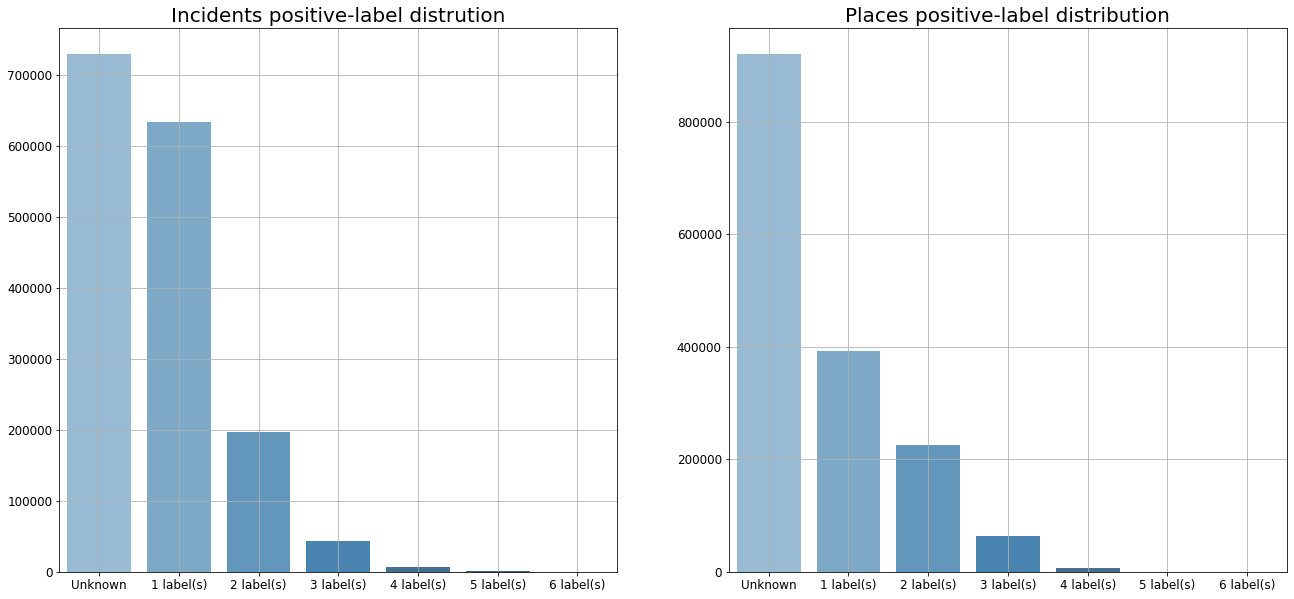

In [39]:
incident_label_counts = df["Number of known incidents"].value_counts()
place_label_counts = df["Number of known places"].value_counts()

# Replace each index with number and %%!
incident_label_counts.index = ["Unknown" if i == 0 else f"{i} label(s)" for i in incident_label_counts.index]
incident_label_counts

place_label_counts.index = ["Unknown" if i == 0 else f"{i} label(s)" for i in place_label_counts.index]
place_label_counts

# Plot the number of images with each number of labels
fig, ax = plt.subplots(1, 2, figsize=(22, 10))
sns.barplot(x=incident_label_counts.index, y=incident_label_counts.values, ax=ax[0], palette="Blues_d")
sns.barplot(x=place_label_counts.index, y=place_label_counts.values, ax=ax[1], palette="Blues_d")
ax[0].set_title("Incidents positive-label distrution", fontsize=20)
ax[1].set_title("Places positive-label distribution", fontsize=20)
# Make the font size of the x and y axis labels larger
ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
ax[0].grid()
ax[1].grid()
plt.show()

Total images:  1608672
Downloadable images:  1179129
Valid images:  1140373
Images with known incidents and places:  687531


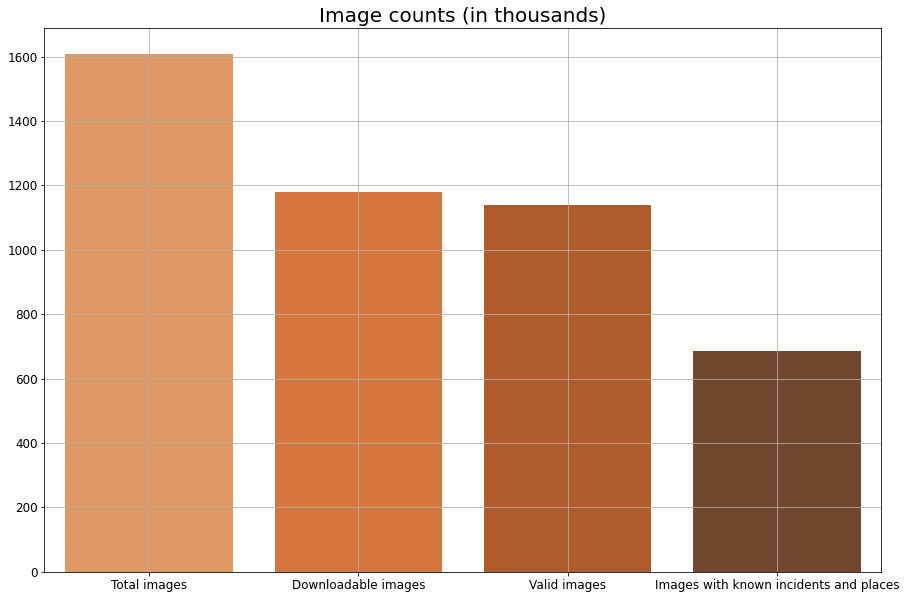

In [47]:
all_images = len(df)
print("Total images: ", all_images)
downloadable_images = len(df[df["downloadable"] == True])
print("Downloadable images: ", downloadable_images)
valid_images = len(df[df["valid_image"] == True])
print("Valid images: ", valid_images)
not_unknown_images = len(df[(df["Number of known incidents"] != 0) & (df["Number of known places"] != 0)])
print("Images with known incidents and places: ", not_unknown_images)

x_labels = ["Total images", "Downloadable images", "Valid images", "Images with known incidents and places"]
y_values = [all_images, downloadable_images, valid_images, not_unknown_images]
y_values = [val // 1000 for val in y_values]

# Plot the number of images with each number of labels in 
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(x=x_labels, y=y_values, ax=ax)
ax.set_title("Image counts (in thousands)", fontsize=20)
# Make the font size of the x and y axis labels larger
ax.tick_params(labelsize=12)
plt.grid()
plt.show()